In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel(r'50_StartUp.xlsx')

In [3]:
df = data.copy()

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [6]:
df.index

RangeIndex(start=0, stop=50, step=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [19]:
corr = df.corr().T
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


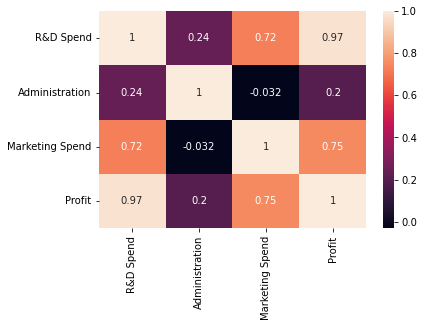

In [45]:
sns.heatmap(corr, annot=True);

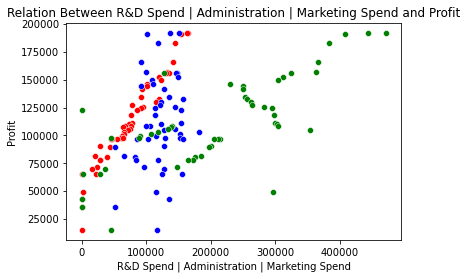

In [49]:
sns.scatterplot(df["R&D Spend"], df["Profit"], color="red");
sns.scatterplot(df["Administration"], df["Profit"], color="blue");
sns.scatterplot(df["Marketing Spend"], df["Profit"], color="green");
plt.xlabel('R&D Spend | Administration | Marketing Spend');
plt.xlabel('R&D Spend | Administration | Marketing Spend');
plt.ylabel('Profit');
plt.title('Relation Between R&D Spend | Administration | Marketing Spend and Profit');

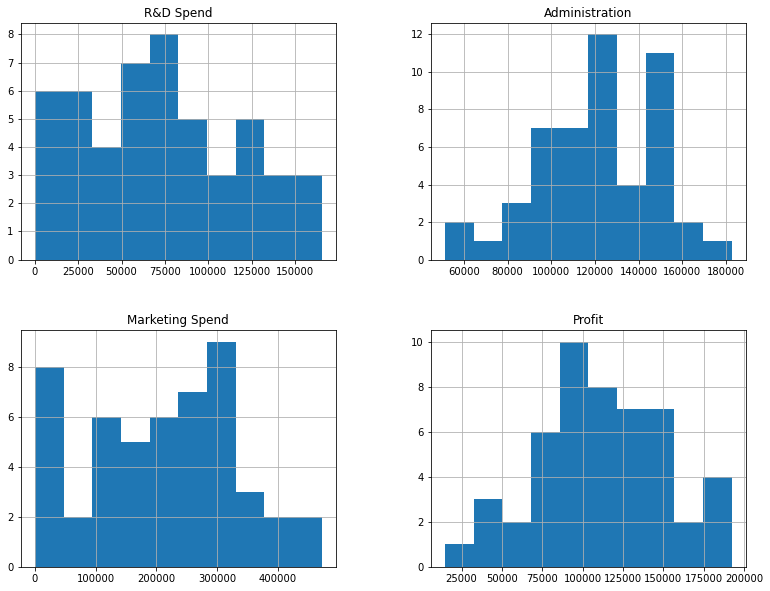

In [56]:
df.hist(figsize = (13,10))
plt.show()

In [60]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [63]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [71]:
df_State = pd.get_dummies(df["State"], prefix='State')

In [72]:
df_State.head()

,State_California,State_Florida,State_New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [73]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [77]:
df= pd.concat([df, df_State], axis = 1)

In [79]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [81]:
df = df.drop(['State', 'State_New York'], axis= 1)

In [83]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [85]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000


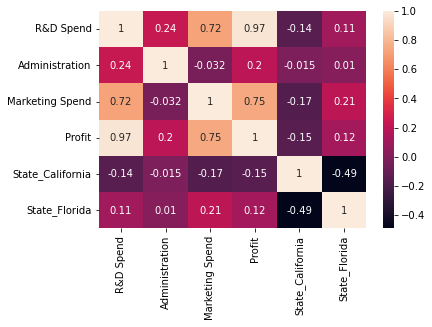

In [89]:
sns.heatmap(df.corr(), annot = True);

In [92]:
X = df.drop(['Profit'], axis=1)
y = df['Profit']

In [103]:
Y = df.iloc[:, 3:45:6]

In [104]:
Y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [105]:
from sklearn.model_selection import train_test_split

In [145]:
X_trian, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.40, random_state= 42)

In [146]:
X_trian.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida
9,123334.88,108679.17,304981.62,1,0
16,78013.11,121597.55,264346.06,1,0
24,77044.01,99281.34,140574.81,0,0
34,46426.07,157693.92,210797.67,1,0
31,61136.38,152701.92,88218.23,0,0


In [147]:
y_train.head()

,Profit
9,149759.96
16,126992.93
24,108552.04
34,96712.80
31,97483.56


In [148]:
from sklearn.linear_model import LinearRegression

In [149]:
model_1 = LinearRegression()

In [150]:
model_1.fit(X_trian, y_train)

LinearRegression()

In [151]:
model_1.score(X_trian, y_train)

0.9446327825089985

In [162]:
y_predict = model_1.predict(X_trian)
y_predict.shape

(30, 1)

[]

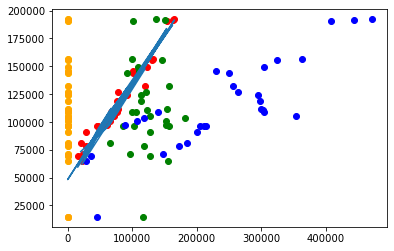

In [165]:
# plt.scatter(X_trian.iloc[:, 0], y_train, color='red')
# plt.scatter(X_trian.iloc[:, 1], y_train, color='green')
# plt.scatter(X_trian.iloc[:, 2], y_train, color='blue')
# plt.scatter(X_trian.iloc[:, 3], y_train, color='yellow')
# plt.scatter(X_trian.iloc[:, 4], y_train, color='orange')
# plt.plot(X_trian.iloc[:, 0] ,y_predict)
# plt.plot()

In [168]:
print(y_train.shape)
print(y_predict.shape)


(30, 1)
(30, 1)


In [173]:
y_train.head()

,Profit
9,149759.96
16,126992.93
24,108552.04
34,96712.80
31,97483.56


In [174]:
y_predict

array([[155056.58133011],
       [116851.53564514],
       [113805.41828118],
       [ 87059.89684912],
       [ 94940.99182047],
       [191592.17677251],
       [ 61920.81462468],
       [114806.74102654],
       [ 99911.61703332],
       [164613.6657075 ],
       [ 99085.38707965],
       [136730.42277726],
       [ 76271.22129531],
       [187153.6465161 ],
       [115721.61792159],
       [183902.83033639],
       [ 59319.60897809],
       [ 92795.65295681],
       [112270.02611038],
       [ 75146.5137606 ],
       [136349.10917177],
       [115868.19266374],
       [130298.87418917],
       [ 48231.09377697],
       [117301.23475386],
       [159012.31640227],
       [ 72159.56996612],
       [147601.61966947],
       [ 98164.41312815],
       [ 73400.80945577]])

In [180]:
y_predict = y_predict.flatten()

In [177]:
y_train = y_train.values

In [178]:
y_train

array([[149759.96],
       [126992.93],
       [108552.04],
       [ 96712.8 ],
       [ 97483.56],
       [192261.83],
       [ 65200.33],
       [105008.31],
       [ 96778.92],
       [156991.12],
       [101004.64],
       [144259.4 ],
       [ 90708.19],
       [191792.06],
       [111313.02],
       [191050.39],
       [ 69758.98],
       [ 96479.51],
       [108733.99],
       [ 78239.91],
       [146121.95],
       [110352.25],
       [124266.9 ],
       [ 14681.4 ],
       [118474.03],
       [155752.6 ],
       [ 71498.49],
       [132602.65],
       [103282.38],
       [ 81229.06]])

In [181]:
y_train = y_train.flatten()

In [184]:
data_prediction = pd.DataFrame({'y_train': y_train, 'y_predict': y_predict, 'difference': abs(y_train - y_predict)})

In [185]:
data_prediction

,y_train,y_predict,difference
0,149759.96,155056.581330,5296.621330
1,126992.93,116851.535645,10141.394355
2,108552.04,113805.418281,5253.378281
3,96712.80,87059.896849,9652.903151
4,97483.56,94940.991820,2542.568180
5,192261.83,191592.176773,669.653227
6,65200.33,61920.814625,3279.515375
7,105008.31,114806.741027,9798.431027
8,96778.92,99911.617033,3132.697033
9,156991.12,164613.665708,7622.545708


In [187]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [188]:
mse = mean_squared_error(y_train, y_predict)
mae = mean_absolute_error(y_train, y_predict)
acc = r2_score(y_train, y_predict)

In [190]:
print('mean_squared_error: {0} \nmean_absolute_error: {1} \nr2_score: {2}'.format(mse, mae, acc))

mean_squared_error: 85050450.34228688 
mean_absolute_error: 6871.045605223073 
r2_score: 0.9446327825089985


In [193]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, RobustScaler, StandardScaler

In [194]:
scaler_1 = MinMaxScaler()
scaler_2 = Normalizer()
scaler_3 = RobustScaler()
scaler_4 = StandardScaler()

In [241]:
df_scaled_1 = scaler_1.fit_transform(df)
df_scaled_2 = scaler_2.fit_transform(df)
df_scaled_3 = scaler_3.fit_transform(df)
df_scaled_4 = scaler_4.fit_transform(df)

In [247]:
df

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1
5,131876.90,99814.71,362861.36,156991.12,0,0
6,134615.46,147198.87,127716.82,156122.51,1,0
7,130298.13,145530.06,323876.68,155752.60,0,1
8,120542.52,148718.95,311613.29,152211.77,0,0
9,123334.88,108679.17,304981.62,149759.96,1,0


In [244]:
df_scaled_1 = pd.DataFrame(df_scaled_1)
df_scaled_2 = pd.DataFrame(df_scaled_2)
df_scaled_3 = pd.DataFrame(df_scaled_3)
df_scaled_4 = pd.DataFrame(df_scaled_4)

In [248]:
df_scaled_1

,0,1,2,3,4,5
0,1.000000,0.651744,1.000000,1.000000,0.0,0.0
1,0.983359,0.761972,0.940893,0.997355,1.0,0.0
2,0.927985,0.379579,0.864664,0.993178,0.0,1.0
3,0.873136,0.512998,0.812235,0.947292,0.0,0.0
4,0.859438,0.305328,0.776136,0.853171,0.0,1.0
5,0.797566,0.369448,0.769126,0.801382,0.0,0.0
6,0.814128,0.730161,0.270710,0.796490,1.0,0.0
7,0.788018,0.717457,0.686493,0.794407,0.0,1.0
8,0.729018,0.741733,0.660500,0.774468,0.0,0.0
9,0.745906,0.436929,0.646443,0.760661,1.0,0.0


In [254]:
X_scaled_1 = df_scaled_1.drop([3], axis=1)
X_scaled_2 = df_scaled_2.drop([3], axis=1)
X_scaled_3 = df_scaled_3.drop([3], axis=1)
X_scaled_4 = df_scaled_4.drop([3], axis=1)

In [252]:
X_scaled_1

,0,1,2,4,5
0,1.000000,0.651744,1.000000,0.0,0.0
1,0.983359,0.761972,0.940893,1.0,0.0
2,0.927985,0.379579,0.864664,0.0,1.0
3,0.873136,0.512998,0.812235,0.0,0.0
4,0.859438,0.305328,0.776136,0.0,1.0
5,0.797566,0.369448,0.769126,0.0,0.0
6,0.814128,0.730161,0.270710,1.0,0.0
7,0.788018,0.717457,0.686493,0.0,1.0
8,0.729018,0.741733,0.660500,0.0,0.0
9,0.745906,0.436929,0.646443,1.0,0.0


In [255]:
y_scaled_1 = df_scaled_1[3]
y_scaled_2 = df_scaled_2[3]
y_scaled_3 = df_scaled_3[3]
y_scaled_4 = df_scaled_4[3]

In [282]:
X_trian_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_scaled_1, y_scaled_1, test_size= 0.40, random_state= 42)
X_trian_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_scaled_2, y_scaled_1, test_size= 0.40, random_state= 42)
X_trian_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_scaled_3, y_scaled_1, test_size= 0.40, random_state= 42)
X_trian_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_scaled_4, y_scaled_1, test_size= 0.40, random_state= 42)

In [257]:
model_1 = LinearRegression()
model_2 = LinearRegression()
model_3 = LinearRegression()
model_4 = LinearRegression()

In [258]:
train_1 = model_1.fit(X_trian_1, y_train_1)
train_2 = model_1.fit(X_trian_2, y_train_2)
train_3 = model_1.fit(X_trian_3, y_train_3)
train_4 = model_1.fit(X_trian_4, y_train_4)

In [276]:
train_1 = model_1.score(X_trian_1, y_train_1)
train_2 = model_1.score(X_trian_2, y_train_2)
train_3 = model_1.score(X_trian_3, y_train_3)
train_4 = model_1.score(X_trian_4, y_train_4)

In [260]:
print('score_1: {0}, \nscore_2: {1}, \nscore_3: {2}, \nscore_4: {3}'.format(train_1, train_2, train_3, train_4))

score_1: 0.3036989544224269, 
score_2: 0.1266518347414024, 
score_3: 0.8777979383406679, 
score_4: 0.9446327825089984


In [261]:
y_predict_1 = model_1.predict(X_trian_1)
y_predict_2 = model_1.predict(X_trian_2)
y_predict_3 = model_1.predict(X_trian_3)
y_predict_4 = model_1.predict(X_trian_4)

In [262]:
y_predict_1.ndim

1

In [263]:
y_train_1.ndim

1

In [264]:
# y_train_1 = y_train_1.values.flatten()
y_train_2 = y_train_2.values.flatten()
y_train_3 = y_train_3.values.flatten()
y_train_4 = y_train_4.values.flatten()

In [265]:
y_predict_1 = y_predict_1.flatten()
y_predict_2 = y_predict_2.flatten()
y_predict_3 = y_predict_3.flatten()
y_predict_4 = y_predict_4.flatten()

In [266]:
y_predict_1

array([0.70750439, 0.64891553, 0.64405354, 0.60409711, 0.61666812,
       0.76440857, 0.56574873, 0.64572177, 0.62333272, 0.72191462,
       0.62302513, 0.67882495, 0.58752474, 0.75798451, 0.64811375,
       0.75257466, 0.56095786, 0.61087766, 0.64222202, 0.58460445,
       0.67990006, 0.64831326, 0.67041374, 0.54335385, 0.6492554 ,
       0.71570066, 0.57938987, 0.69861442, 0.62338851, 0.5803537 ])

In [267]:
data_prediction_1 = pd.DataFrame({'y_train_1': y_train_1, 'y_predict_1': y_predict_1, 'difference_1': abs(y_train_1 - y_predict_1)})
data_prediction_2 = pd.DataFrame({'y_train_2': y_train_2, 'y_predict_2': y_predict_2, 'difference_2': abs(y_train_2 - y_predict_2)})
data_prediction_3 = pd.DataFrame({'y_train_3': y_train_3, 'y_predict_3': y_predict_3, 'difference_3': abs(y_train_3 - y_predict_3)})
data_prediction_4 = pd.DataFrame({'y_train_4': y_train_4, 'y_predict_4': y_predict_4, 'difference_4': abs(y_train_4 - y_predict_4)})

In [268]:
data_prediction_1

,y_train_1,y_predict_1,difference_1
9,0.760661,0.707504,0.053157
16,0.632454,0.648916,0.016461
24,0.528609,0.644054,0.115444
34,0.461939,0.604097,0.142158
31,0.466280,0.616668,0.150388
0,1.000000,0.764409,0.235591
44,0.284485,0.565749,0.281264
27,0.508654,0.645722,0.137068
33,0.462312,0.623333,0.161021
5,0.801382,0.721915,0.079467


In [269]:
data_prediction_2

,y_train_2,y_predict_2,difference_2
0,0.760661,0.628977,0.131684
1,0.632454,0.610108,0.022347
2,0.528609,0.628464,0.099855
3,0.461939,0.590929,0.128990
4,0.466280,0.606718,0.140438
5,1.000000,0.624996,0.375004
6,0.284485,0.565921,0.281436
7,0.508654,0.601226,0.092572
8,0.462312,0.604464,0.142152
9,0.801382,0.626772,0.174609


In [270]:
data_prediction_3

,y_train_3,y_predict_3,difference_3
0,0.760661,0.729376,0.031285
1,0.632454,0.571426,0.061029
2,0.528609,0.558609,0.030000
3,0.461939,0.449139,0.012800
4,0.466280,0.482175,0.015895
5,1.000000,0.880874,0.119126
6,0.284485,0.345637,0.061153
7,0.508654,0.562564,0.053911
8,0.462312,0.499394,0.037083
9,0.801382,0.768361,0.033021


In [271]:
data_prediction_4

,y_train_4,y_predict_4,difference_4
0,0.760661,0.790488,0.029827
1,0.632454,0.575346,0.057109
2,0.528609,0.558192,0.029583
3,0.461939,0.407581,0.054358
4,0.466280,0.451962,0.014318
5,1.000000,0.996229,0.003771
6,0.284485,0.266017,0.018468
7,0.508654,0.563831,0.055177
8,0.462312,0.479953,0.017641
9,0.801382,0.844306,0.042924


In [272]:
mse_1 = mean_squared_error(y_train_1, y_predict_1)
mse_2 = mean_squared_error(y_train_2, y_predict_2)
mse_3 = mean_squared_error(y_train_3, y_predict_3)
mse_4 = mean_squared_error(y_train_4, y_predict_4)

mae_1 = mean_absolute_error(y_train_1, y_predict_1)
mae_2 = mean_absolute_error(y_train_2, y_predict_2)
mae_3 = mean_absolute_error(y_train_3, y_predict_3)
mae_4 = mean_absolute_error(y_train_4, y_predict_4)

acc_1 = r2_score(y_train_1, y_predict_1)
acc_2 = r2_score(y_train_2, y_predict_2)
acc_3 = r2_score(y_train_3, y_predict_3)
acc_4 = r2_score(y_train_4, y_predict_4)

In [273]:
print('mean_squared_error: {0} \nmean_absolute_error: {1} \nr2_score: {2}'.format(mse_1, mae_1, acc_1))
print('#'*70)
print('mean_squared_error: {0} \nmean_absolute_error: {1} \nr2_score: {2}'.format(mse_2, mae_2, acc_2))
print('#'*70)
print('mean_squared_error: {0} \nmean_absolute_error: {1} \nr2_score: {2}'.format(mse_3, mae_3, acc_3))
print('#'*70)
print('mean_squared_error: {0} \nmean_absolute_error: {1} \nr2_score: {2}'.format(mse_4, mae_4, acc_4))

mean_squared_error: 0.03391804093328513 
mean_absolute_error: 0.15258387096218745 
r2_score: 0.3036989544224269
######################################################################
mean_squared_error: 0.04254231557799728 
mean_absolute_error: 0.16638207462705512 
r2_score: 0.1266518347414024
######################################################################
mean_squared_error: 0.005952676009634534 
mean_absolute_error: 0.052083975060334395 
r2_score: 0.8777979383406679
######################################################################
mean_squared_error: 0.0026970339354641603 
mean_absolute_error: 0.03869258344075298 
r2_score: 0.9446327825089984


In [283]:
train_4 = model_4.fit(X_trian_4, y_train_4)
y_predict_test = model_4.predict(X_test_4)

In [285]:
mse_4 = mean_squared_error(y_test_4, y_predict_test)
mae_4 = mean_absolute_error(y_test_4, y_predict_test)
acc_4 = r2_score(y_test_4, y_predict_test)

In [286]:
print('mean_squared_error: {0} \nmean_absolute_error: {1} \nr2_score: {2}'.format(mse_4, mae_4, acc_4))

mean_squared_error: 0.002476441868738903 
mean_absolute_error: 0.039039671385709476 
r2_score: 0.9527099580322334


In [297]:
model_4.intercept_

0.5479536588400674

In [299]:
model_4.coef_

array([ 0.20163184, -0.01324061,  0.02345257, -0.00022312,  0.00225704])

In [287]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [288]:
df_State = pd.get_dummies(data["State"], prefix='State')

In [290]:
data = pd.concat([data, df_State], axis=1)

In [292]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [293]:
data = data.drop(['State_New York'], axis=1)

In [294]:
data = data.drop(['State'], axis=1)

In [295]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [300]:
import statsmodels.api as sm

In [306]:
stmodel = sm.OLS(y, X).fit()

In [307]:
stmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              735.7
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                    6.07e-42
Time:                        05:24:48   Log-Likelihood:                         -544.86
No. Observations:                  50   AIC:                                      1100.
Df Residuals:                      45   BIC:                                      1109.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7308      0.066     11.072      0.000       0.598       0.864
Administration       0.3021      0.037      8.174      0.000       0.228       0.377
Marketing Spend      0.0776      0.023      3.397      0.001       0.032       0.124
State_California  6019.9282   4596.090      1.310      0.197   -3237.072    1.53e+04
State_Florida     3814.3461   4819.854      0.791      0.433   -5893.338    1.35e+04
==============================================================================
Omnibus:                        0.012   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.071
Skew:                          -0.015   Prob(JB):                        0.965
Kurtosis:                       2.817   Cond. No.                     8.14e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [308]:
X = sm.add_constant(X)

In [309]:
stmodel = sm.OLS(y, X).fit()

In [310]:
stmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           1.34e-27
Time:                        05:26:09   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
R&D Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California    41.8870   3256.039      0.013      0.990   -6520.229    6604.003
State_Florida      240.6758   3338.857      0.072      0.943   -6488.349    6969.701
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [311]:
X = X.drop(['State_California'], axis= 1)

In [312]:
stmodel = sm.OLS(y, X).fit()

In [313]:
stmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           8.49e-29
Time:                        05:28:21   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
R&D Spend           0.8060      0.046     17.606      0.000       0.714       0.898
Administration     -0.0270      0.052     -0.523      0.604      -0.131       0.077
Marketing Spend     0.0270      0.017      1.592      0.118      -0.007       0.061
State_Florida     220.1585   2900.536      0.076      0.940   -5621.821    6062.138
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [314]:
X = X.drop(['State_Florida'], axis= 1)

In [315]:
stmodel = sm.OLS(y, X).fit()

In [316]:
stmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           4.53e-30
Time:                        05:29:21   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R&D Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [318]:
X = X.drop(['Administration'], axis= 1)
stmodel = sm.OLS(y, X).fit()
stmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           2.16e-31
Time:                        05:30:36   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R&D Spend           0.7966      0.041     19.266      0.000       0.713       0.880
Marketing Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [319]:
X = X.drop(['Marketing Spend'], axis= 1)
stmodel = sm.OLS(y, X).fit()
stmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           3.50e-32
Time:                        05:36:49   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
R&D Spend      0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""